In [1]:
%matplotlib notebook 
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
class Flock(object):
    """Represents the N-birds configuration at a given moment, in 2D. Birds are flocking in a square of side L
    with periodic boundary conditions. Birds' positions and velocities are contained in two arrays. 
    At t=0, these are pos0 and vel0.
    Birds flock will evolve at each time-step Dt"""
    
    def __init__(self,N,L,eta,v,r, Dt, pos0, vel0):
        """we choose L as a multiple of r in order to simplify"""
        self.positions = pos0
        self.velocities = vel0
        self.a = int(L/r)
        self.checkering = [[[] for i in range(self.a)] for j in range(self.a)]
        self.eta = eta
        self.v = v
        self.r = r 
        """the interaction radius"""
        self.L = L 
        """the scale of the flock"""
        self.N = N
        self.Dt=Dt
        self.localize_birds()
        
    def localize_birds(self):
        """compute the cell of each bird from its position and actualize self.checkering"""
        self.checkering = [[[] for i in range(self.a)] for j in range(self.a)]
        for k in range (self.N):
            i,j = int(self.positions[k][0]/self.r),int(self.positions[k][1]/r)
            self.checkering[i][j].append(k)
        
    
    def compute_new_velocity(self, k):
        """compute the new velocity bird number k will adopt, according to the velocity of its neighbours.
        Neighbours are necessary contained in the cell of bird number k and the eight cells around.
        For each of these potential neighbours, we have to check if they are within a circle of radius r around bird number k
        the interaction radius"""
        i,j = int(self.positions[k][0]/self.r),int(self.positions[k][1]/r)
        cos_avr = 0
        sin_avr = 0
        for p in range(-1,2):
            for q in range (-1,2):
                for bird in self.checkering[(i+p)%self.a][(j+q)%self.a]:
                    if np.linalg.norm(self.positions[k]-self.positions[bird])<self.r : #check if birds are within a circle of radius r
                        cos_avr += self.velocities[bird,0]
                        sin_avr += self.velocities[bird,1]
        if cos_avr == 0 :
            theta=np.pi+np.sign(sin_avr)*(np.pi)/2
        else :
            theta=np.arctan(sin_avr/cos_avr)
            theta= theta +(1-np.sign(theta)*np.sign(sin_avr))*np.pi/2
        theta+=npr.uniform(-self.eta/2,self.eta/2)
        new_velocity = self.v*np.array([np.cos(theta),np.sin(theta)])
        return new_velocity
    
    def make_step(self):
        """compute the new velocities and positions that birds will get after the time-step,
        actualize self.positions, self.velocities and self.chekering"""
        new_velocities=np.zeros((self.N,2))
        new_positions=(self.positions).copy()
        for k in range(N):
            new_velocities[k]=self.compute_new_velocity(k)
            new_positions[k]+=(self.velocities[k]*self.Dt)
            new_positions[k]=new_positions[k]%self.L #%L for periodic boundary conditions
        self.positions = new_positions
        self.localize_birds()
        self.velocities=new_velocities
        
    def compute_avr_norm_velocity(self):
        """compute the average normalized velocity of birds in the flock at time t"""
        va = [0,0]
        for k in range (self.N):
            va+=self.velocities[k]
        return np.linalg.norm(va/(self.N*v))
    
            

In [16]:
#animation of flocking birds 
N=10
L=10
L1=5
L2=3
eta=0.1
v=1
r=1.0
r0=0.5
Dt=1
Dt0=0.5
#pos0=np.array([[5.,5.],[2.,3.],[3.,7.]])
pos0=npr.uniform(0,L,size=(N,2))
pos01=npr.uniform(0,L1,size=(N,2))
pos02=npr.uniform(0,L2,size=(N,2))
#vel0=np.array([[1.,0.],[0.5,0.],[1.,0.]])
theta = npr.uniform(0.,2*np.pi,N)
vel0=np.zeros((N,2))
vel0[:,0]=v*np.cos(theta)
vel0[:,1]=v*np.sin(theta)
fl=Flock(N,L,eta,v,r, Dt, pos0, vel0)
#flock_to_image(fl)
avg_vel = fl.compute_avr_norm_velocity()
#print("average velocity: ",avg_vel)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
line, = ax.plot([], [], 'bo', ms=5)
ax.set_xlim(0, fl.L)
ax.set_ylim(0, fl.L)



def make_frame(t):
    fl.make_step()
    x = fl.positions[:,0]
    y = fl.positions[:,1]
    line.set_data(x, y)
    return line,
animation.FuncAnimation(fig, make_frame, interval=200, blit=False)
ani = animation.FuncAnimation(fig, make_frame, frames=10, interval=200, blit=False)
ani.save('movie4.mp6',writer = 'ffmpeg')


<IPython.core.display.Javascript object>

ValueError: Invalid file object: <_io.BufferedReader name=58>

<IPython.core.display.Javascript object>


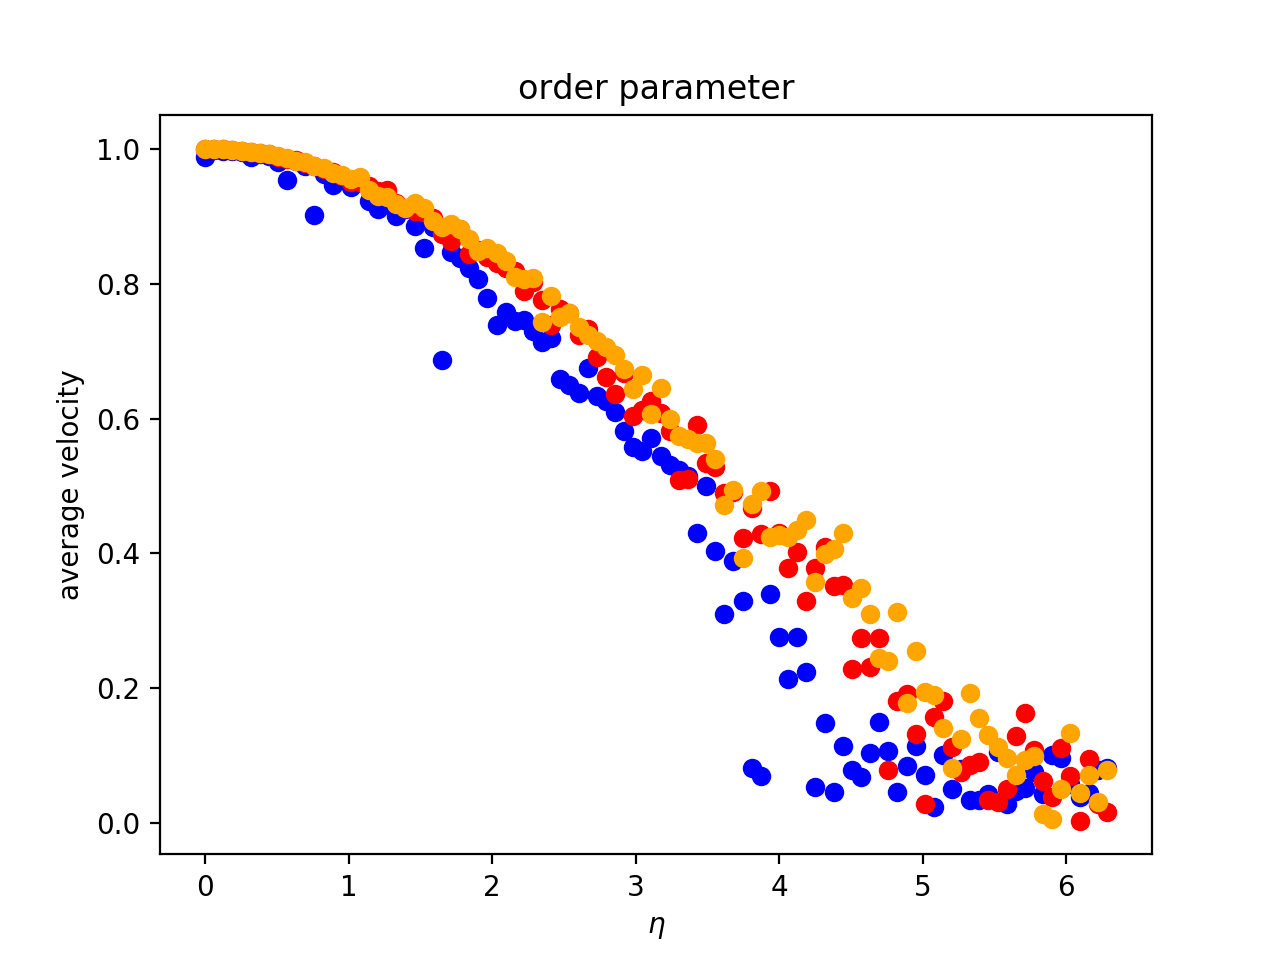

In [4]:
#order parameter dependance within eta 
eta0 = np.linspace(0,2*np.pi,100)
fl0 = [Flock(N, L, eta1, v, r, Dt, pos0, vel0) for eta1 in eta0]
fl01 = [Flock(N, L1, eta1, v, r, Dt, pos01, vel0) for eta1 in eta0]
fl02 = [Flock(N, L2, eta1, v, r, Dt, pos02, vel0) for eta1 in eta0]


for i in range(40):
    for fl1 in  fl0:
        fl1.make_step()
    for fl2 in fl01:
        fl2.make_step()
    for fl3 in fl02:
        fl3.make_step()
avg_vel0 = [fl1.compute_avr_norm_velocity() for fl1 in fl0]
avg_vel01 = [fl1.compute_avr_norm_velocity() for fl1 in fl01]
avg_vel02 = [fl1.compute_avr_norm_velocity() for fl1 in fl02]
plt.xlabel(r'$\eta$')
plt.ylabel("average velocity")
plt.title("order parameter")
plt.plot(eta0,avg_vel0,"o", color="blue", label="L=10")
plt.plot(eta0,avg_vel01,"o", color="red", label="L=5")
plt.plot(eta0,avg_vel02,"o", color="orange", label="L=3")
plt.savefig("order parameter dependance within eta for different values of L2")
#plt.plot(eta0,avg_vel0,"o")



In [32]:
"""#order parameter dependance within N
N0= [8,10,12,14,16,20]
theta1 = [npr.uniform(0.,2*np.pi,N) for n in N0]
vel01=[np.zeros((n,2)) for n in N0]
vel01[:,0]=v*np.cos(theta1)
vel01[:,1]=v*np.sin(theta1)
flockN = [Flock(N1, L, eta, v, r, Dt, npr.uniform(0,L,size=(N1,2)), np.zeros((N1,2))) for N1 in N0]
for i in range(10):
    for fl1 in flockN:
        fl1.make_step()
avg_vel_N =[fl1.compute_avr_velocity() for fl1 in flockN]
plt.xlabel("N")
plt.ylabel("order parameter")
plt.plot(N0,avg_vel_N,color="red")
plt.savefig("order parameter dependance within density")"""



'#order parameter dependance within N\nN0= [8,10,12,14,16,20]\ntheta1 = [npr.uniform(0.,2*np.pi,N) for n in N0]\nvel01=[np.zeros((n,2)) for n in N0]\nvel01[:,0]=v*np.cos(theta1)\nvel01[:,1]=v*np.sin(theta1)\nflockN = [Flock(N1, L, eta, v, r, Dt, npr.uniform(0,L,size=(N1,2)), np.zeros((N1,2))) for N1 in N0]\nfor i in range(10):\n    for fl1 in flockN:\n        fl1.make_step()\navg_vel_N =[fl1.compute_avr_velocity() for fl1 in flockN]\nplt.xlabel("N")\nplt.ylabel("order parameter")\nplt.plot(N0,avg_vel_N,color="red")\nplt.savefig("order parameter dependance within density")'

In [52]:
#plot within quiver 
fl0 = Flock(N,L,eta,v,r, Dt, pos0, vel0)
X, Y = fl0.positions[:,0], fl.positions[:,1]
U, V = fl0.velocities[:,0], fl.velocities[:,1]

#fig, ax = plt.subplots(1,1)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
#line, = ax.plot([], [], 'bo', ms=5)
Q = ax.quiver(X, Y, U, V, color='r',)
ax.set_xlim(0, fl.L)
ax.set_ylim(0, fl.L)

def update_quiver(t):
        fl0.make_step()
        X, Y = fl0.positions[:,0], fl0.positions[:,1]
        U, V = fl0.velocities[:,0], fl0.velocities[:,1]
        Q.set_UVC(U,V)
        Q.set_offsets(np.stack([X,Y],axis =1))
        return Q,

animation.FuncAnimation(fig, update_quiver,
                               interval=50, blit=False)




SyntaxError: positional argument follows keyword argument (<ipython-input-52-54fb48e91dd7>, line 10)

In [6]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()